In [1]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
input_file = 'car.data.txt'

# Reading the data
X = []
count = 0
with open(input_file, 'r') as f:
    for line in f.readlines():
        data = line[:-1].split(',')
        X.append(data)

X = np.array(X)

In [3]:
# Convert string data to numerical data
label_encoder = []
X_encoded = np.empty(X.shape)
for i,item in enumerate(X[0]):
    label_encoder.append(preprocessing.LabelEncoder())
    X_encoded[:,i] = label_encoder[-1].fit_transform(X[:,i])
    
X = X_encoded[:,:-1].astype(int)
Y = X_encoded[:,-1].astype(int)

In [4]:
# Build a Random Forest Classifier
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7}
classifier = RandomForestClassifier(**params)
classifier.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=7,
            verbose=0, warm_start=False)

In [5]:
# Cross Validation
from sklearn.model_selection import cross_val_score

In [6]:
accuracy = cross_val_score(classifier, X, Y, scoring='accuracy', cv=3)
print("Accuracy of the classifier: " + str(round(100 * accuracy.mean(), 2)) + "%")

Accuracy of the classifier: 78.19%


In [7]:
# Testing encoding on single data instance
input_data = ['vhigh', 'vhigh', '2', '2', 'small', 'low']
input_data_encoded = [-1] * len(input_data)
for i,item in enumerate(input_data):
    input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]]))
input_data_encoded = np.array(input_data_encoded)

In [8]:
# Predict and print output for a particular datapoint
output_class = classifier.predict(input_data_encoded)
print("Output class:", label_encoder[-1].inverse_transform(output_class.reshape(-1,1))[0])

Output class: ['unacc']


/Users/jincongho/anaconda/envs/jupyter3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


## Extracting Validation Curves

In [9]:
from sklearn.model_selection import validation_curve

In [10]:
classifier = RandomForestClassifier(max_depth=4, random_state=7)
parameter_grid = np.linspace(1, 200, 20).astype(int)
train_scores, validation_scores = validation_curve(classifier, X, Y, "n_estimators", parameter_grid, cv=5)

In [11]:
print("Validation Curves\n")
print("Param: n_estimators\nTraining Scores:\n", train_scores)
print("Param: n_estimators\nValidation Scores:\n", validation_scores)

Validation Curves

Param: n_estimators
Training Scores:
 [[ 0.70043415  0.71273517  0.70188133  0.70043415  0.70375723]
 [ 0.82127352  0.8154848   0.82127352  0.79015919  0.80780347]
 [ 0.79956585  0.80390738  0.81041968  0.8024602   0.8150289 ]
 [ 0.79305355  0.80607815  0.81186686  0.80535456  0.80852601]
 [ 0.80101302  0.80463097  0.81041968  0.80824891  0.80924855]
 [ 0.79522431  0.80463097  0.81114327  0.81186686  0.80852601]
 [ 0.79956585  0.80463097  0.81186686  0.81114327  0.80924855]
 [ 0.79667149  0.80680174  0.81186686  0.81403763  0.81213873]
 [ 0.80390738  0.80463097  0.81186686  0.81041968  0.81286127]
 [ 0.80173661  0.80535456  0.81259045  0.80752533  0.80491329]
 [ 0.7959479   0.80535456  0.81186686  0.80752533  0.80852601]
 [ 0.80318379  0.80463097  0.81114327  0.80824891  0.81575145]
 [ 0.79956585  0.80463097  0.81114327  0.80824891  0.81358382]
 [ 0.80390738  0.80607815  0.81114327  0.80824891  0.81430636]
 [ 0.80390738  0.80535456  0.81041968  0.8089725   0.8150289 

In [12]:
import matplotlib.pyplot as plt

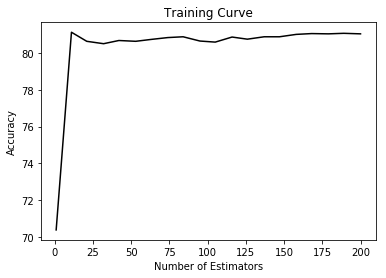

In [13]:
# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100 * np.average(train_scores, axis=1), color='black')
plt.title('Training Curve')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

In [14]:
classifier = RandomForestClassifier(n_estimators=20, random_state=7)
parameter_grid = np.linspace(2,20,10).astype(int)
train_scores, valid_scores = validation_curve(classifier, X, Y, "max_depth", parameter_grid, cv=5)

In [15]:
print("Param: max_depth\nTraining Scores:\n", train_scores)
print("Param: max_depth\nValidation Scores:\n", validation_scores)

Param: max_depth
Training Scores:
 [[ 0.71852388  0.70043415  0.70043415  0.70043415  0.69942197]
 [ 0.80607815  0.80535456  0.80752533  0.79450072  0.81069364]
 [ 0.90665702  0.91027496  0.92836469  0.89797395  0.90679191]
 [ 0.97467438  0.96743849  0.96888567  0.97829233  0.96820809]
 [ 0.99421129  0.99710564  0.99782923  0.99855282  0.99277457]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          1.          1.          1.        ]]
Param: max_depth
Validation Scores:
 [[ 0.69942197  0.68786127  0.46531792  0.69942197  0.69767442]
 [ 0.71098266  0.73121387  0.71965318  0.80346821  0.75290698]
 [ 0.71098266  0.7716763   0.72543353  0.75722543  0.75290698]
 [ 0.71098266  0.76589595  0.71965318  0.75722543  0.72965116]
 [ 0.71098266  0.76878613  0.71965318  0.7572

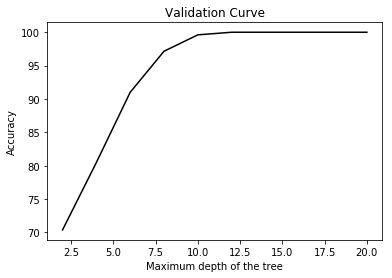

In [16]:
# Plot the curve
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title("Validation Curve")
plt.xlabel("Maximum depth of the tree")
plt.ylabel("Accuracy")
plt.show()

## Extracting Learning Curves

In [17]:
from sklearn.model_selection import learning_curve

In [19]:
classifier = RandomForestClassifier(random_state=7)

In [26]:
parameter_grid = np.array([200,500,800,1100])
train_sizes, train_scores, validation_scores = learning_curve(classifier, 
                                                             X, Y, train_sizes=parameter_grid, cv=5)

ValueError: train_sizes has been interpreted as fractions of the maximum number of training samples and must be within (0, 1], but is within [0.000000, 1100.000000].

In [21]:
print('Learning Curve')
print("Training Scores:\n", train_scores)
print("Validation Scores:\n", validation_scores)

Learning Curve
Training Scores:
 [[ 1.          1.          1.          1.          1.        ]
 [ 1.          1.          0.998       0.998       0.998     ]
 [ 0.99875     0.9975      0.99875     0.99875     0.99875   ]
 [ 0.99818182  0.99545455  0.99909091  0.99818182  0.99818182]]
Validation Scores:
 [[ 0.69942197  0.69942197  0.69942197  0.69942197  0.70348837]
 [ 0.74855491  0.65028902  0.76878613  0.76589595  0.70348837]
 [ 0.70520231  0.78612717  0.52312139  0.76878613  0.77034884]
 [ 0.65028902  0.75433526  0.65317919  0.75433526  0.76744186]]


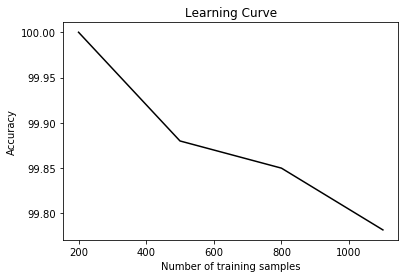

In [22]:
plt.figure()
plt.plot(parameter_grid, 100*np.average(train_scores, axis=1), color='black')
plt.title('Learning Curve')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.show()